In [7]:
pip install openpyxl

  Using cached openpyxl-3.1.5-py2.py3-none-any.whl.metadata (2.5 kB)
  Using cached et_xmlfile-2.0.0-py3-none-any.whl.metadata (2.7 kB)
Using cached openpyxl-3.1.5-py2.py3-none-any.whl (250 kB)
Using cached et_xmlfile-2.0.0-py3-none-any.whl (18 kB)
Note: you may need to restart the kernel to use updated packages.


findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Fo

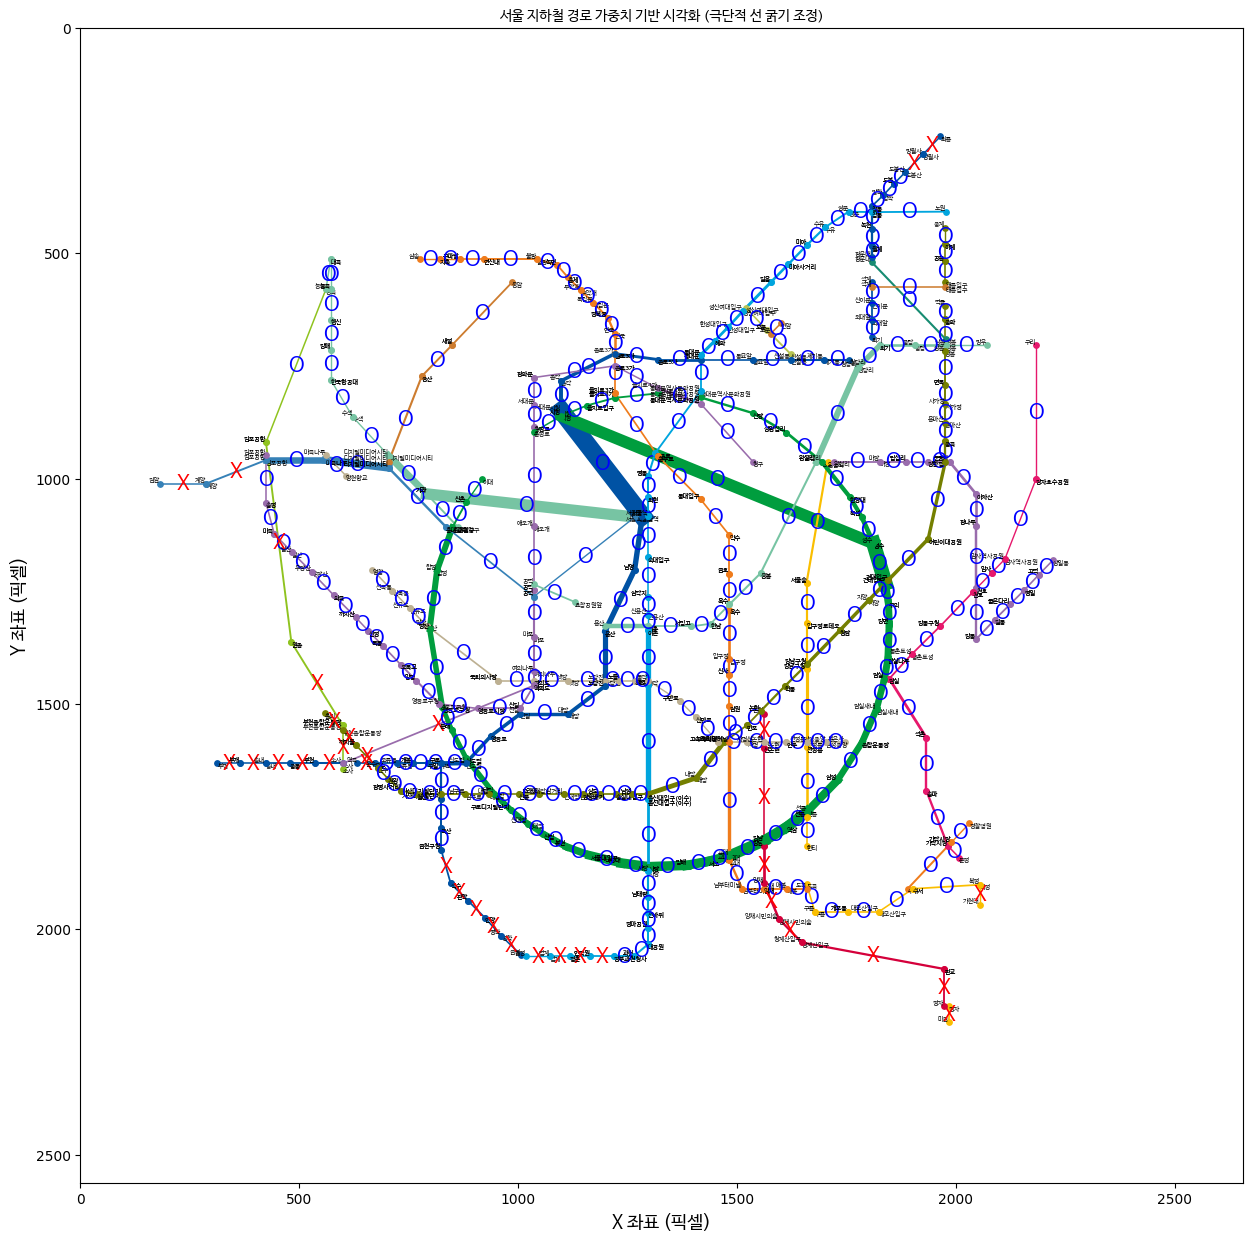

In [32]:
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm
import pandas as pd

# 1. 데이터 불러오기
file_path = "/root/Metro_Visualization/선의 굵기/[0202최종]상위40퍼센트_9개_데이터_동일가중_평균계산_40%, 구간정보(기동카범위다).xlsx"
df = pd.read_excel(file_path, sheet_name='Sheet1')

# 2. 폰트 설정
font_path = "/root/Metro_Visualization/NanumBarunGothic.ttf"
font_prop = fm.FontProperties(fname=font_path)
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

# 3. 이미지 크기 설정
image_width = 2656
image_height = 2562

# 4. 노선 색상 매핑
line_colors = {
    "01호선": "#0052A4", "02호선": "#009D3E", "03호선": "#EF7C1C", "04호선": "#00A5DE",
    "05호선": "#996CAC", "06호선": "#CD7C2F", "07호선": "#747F00", "08호선": "#E6186C",
    "09호선": "#BDB092", "경의선": "#77C4A3", "신분당선": "#D4003B", "수인분당선": "#FABE00",
    "공항철도": "#3681B7", "인천1호선": "#FFCA08", "인천2호선": "#ED8B00",
    "의정부경전철": "#FDA600", "용인경전철": "#6FB245", "우이신설경전철": "#B7C452",
    "경춘선": "#178C72", "경강선": "#003DA5", "서해선": "#8FC31F", "신림선": "#6789CA",
    "01-1호선": "#0052A4", "01-2호선": "#0052A4", "01-3호선": "#0052A4", "01-4호선": "#0052A4", "01-5호선": "#0052A4",
    "02-1호선": "#009D3E", "02-2호선": "#009D3E", "02-3호선": "#009D3E", "02-4호선": "#009D3E",
    "05-1호선": "#996CAC", "05-2호선": "#996CAC",
    "경의선-1호선": "#77C4A3", "경춘선-1호선": "#178C72", "경춘선-2호선": "#178C72",
    "GTX-A": "#9A6292", "GTX-A-1": "#9A6292"
}

# 5. 가중 평균 정규화 (선의 두께 설정)
min_weight = df["average_passenger"].min()
max_weight = df["average_passenger"].max()
df["normalized_weight"] = (df["average_passenger"] - min_weight) / (max_weight - min_weight)

# 6. 캔버스 준비
fig, ax = plt.subplots(figsize=(15, 15))
ax.set_xlim(0, image_width)
ax.set_ylim(image_height, 0)  # Y축 뒤집기

# 7. 경로 시각화
for _, row in df.iterrows():
    start_x, start_y = row["start_x"], row["start_y"]
    end_x, end_y = row["end_x"], row["end_y"]
    line_color = line_colors.get(row["line_y"], "#000000")  # line_y의 노선 색상

    # **선의 굵기 극단적 조정 (최대 대비 강조)**
    weight = (row["normalized_weight"] ** 2) * 12 + 1  # 가중치 지수 변환 적용

    # 8. 선 그리기 (강한 대비)
    ax.plot([start_x, end_x], [start_y, end_y], color=line_color, linewidth=weight, alpha=1.0)

    # 9. 역 점 표시 (노선 색과 동일)
    ax.scatter(start_x, start_y, color=line_color, s=15, zorder=3)  # 시작역 점
    ax.scatter(end_x, end_y, color=line_color, s=15, zorder=3)  # 도착역 점

    # 10. 역 이름 표시
    ax.text(start_x, start_y, row["start_station"], fontsize=4.5, fontproperties=font_prop, ha="right", va="bottom")
    ax.text(end_x, end_y, row["end_station"], fontsize=4.5, fontproperties=font_prop, ha="left", va="top")

    # 11. climate_pass 여부에 따라 O 또는 X 표시
    mid_x = (start_x + end_x) / 2
    mid_y = (start_y + end_y) / 2
    if row["climate_pass"] == "O":
        ax.text(mid_x, mid_y, "O", fontsize=15, color="blue", fontproperties=font_prop, ha="center", va="center")
    elif row["climate_pass"] == "X":
        ax.text(mid_x, mid_y, "X", fontsize=15, color="red", fontproperties=font_prop, ha="center", va="center")

# 12. 제목 및 레이블 설정
ax.set_title("서울 지하철 경로 가중치 기반 시각화 (극단적 선 굵기 조정)", fontsize=16, fontproperties=font_prop)
ax.set_xlabel("X 좌표 (픽셀)", fontsize=13, fontproperties=font_prop)
ax.set_ylabel("Y 좌표 (픽셀)", fontsize=13, fontproperties=font_prop)

# 13. 이미지 저장 및 표시
output_path = "/root/Metro_Visualization/선의 굵기/가중치_기반_경로_시각화_역이름.png"
plt.savefig(output_path, dpi=300, bbox_inches="tight", transparent=False)
plt.show()

findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Fo

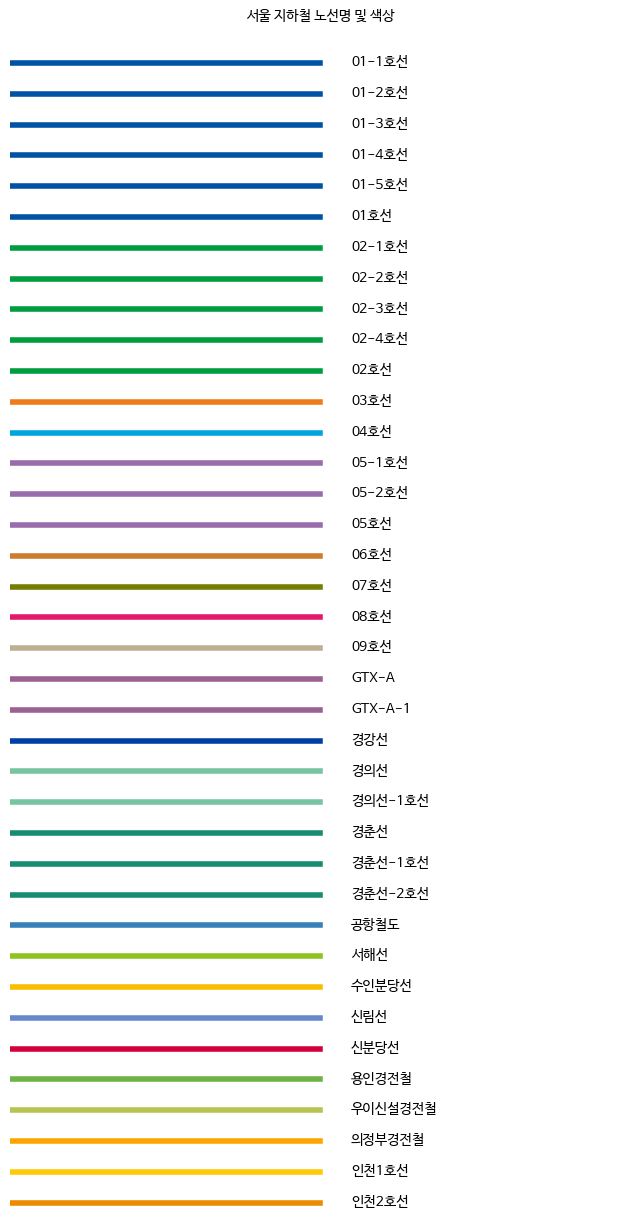

이미지가 저장되었습니다: /root/Metro_Visualization/선의 굵기/서울_지하철_노선_색상_선_표현_오름차순.png


In [40]:
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm

# 폰트 설정
font_path = "/root/Metro_Visualization/NanumBarunGothic.ttf"
font_prop = fm.FontProperties(fname=font_path)
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

# 노선 색상 매핑
line_colors = {
    "01호선": "#0052A4", "02호선": "#009D3E", "03호선": "#EF7C1C", "04호선": "#00A5DE",
    "05호선": "#996CAC", "06호선": "#CD7C2F", "07호선": "#747F00", "08호선": "#E6186C",
    "09호선": "#BDB092", "경의선": "#77C4A3", "신분당선": "#D4003B", "수인분당선": "#FABE00",
    "공항철도": "#3681B7", "인천1호선": "#FFCA08", "인천2호선": "#ED8B00",
    "의정부경전철": "#FDA600", "용인경전철": "#6FB245", "우이신설경전철": "#B7C452",
    "경춘선": "#178C72", "경강선": "#003DA5", "서해선": "#8FC31F", "신림선": "#6789CA",
    "01-1호선": "#0052A4", "01-2호선": "#0052A4", "01-3호선": "#0052A4", "01-4호선": "#0052A4", "01-5호선": "#0052A4",
    "02-1호선": "#009D3E", "02-2호선": "#009D3E", "02-3호선": "#009D3E", "02-4호선": "#009D3E",
    "05-1호선": "#996CAC", "05-2호선": "#996CAC",
    "경의선-1호선": "#77C4A3", "경춘선-1호선": "#178C72", "경춘선-2호선": "#178C72",
    "GTX-A": "#9A6292", "GTX-A-1": "#9A6292"
}

# 노선명 정렬 (내림차순)
sorted_line_colors = dict(sorted(line_colors.items(), reverse=True))

# 캔버스 준비
fig, ax = plt.subplots(figsize=(8, len(sorted_line_colors) * 0.4))

# 박스 대신 얇은 선으로 노선명과 색상 추가
for idx, (line_name, color) in enumerate(sorted_line_colors.items()):
    ax.plot([0, 1], [idx + 0.5, idx + 0.5], color=color, linewidth=4)  # 얇은 선
    ax.text(1.1, idx + 0.5, line_name, va='center', ha='left', fontsize=10, fontproperties=font_prop)  # 노선명 추가

# 시각화 범위 및 설정
ax.set_xlim(0, 2)
ax.set_ylim(0, len(sorted_line_colors))
ax.axis("off")  # 축 숨기기

# 제목 추가
plt.title("서울 지하철 노선명 및 색상", fontsize=14, fontproperties=font_prop, pad=20)

# 저장 및 표시
output_path = "/root/Metro_Visualization/선의 굵기/서울_지하철_노선_색상_선_표현_오름차순.png"
plt.savefig(output_path, dpi=300, bbox_inches="tight", transparent=False)
plt.show()

print(f"이미지가 저장되었습니다: {output_path}")

In [1]:
import pandas as pd
import glob

# 파일 경로 패턴 설정
file_paths = sorted(glob.glob("/root/Metro_Visualization/선의 굵기/0204_상위40퍼_구간정보/0202_상위40퍼센트_구간정보_*번째.xlsx"))

# 데이터 병합을 위한 리스트
data_list = []

# 각 파일을 읽어서 데이터 리스트에 추가
for file_path in file_paths:
    df = pd.read_excel(file_path)
    data_list.append(df)

# 모든 데이터프레임을 하나로 병합
merged_df = pd.concat(data_list, ignore_index=True)

# 그룹별 평균 계산
avg_df = (
    merged_df.groupby(["start_station", "end_station", "lines", "climate_pass"], as_index=False)
    .agg(avg_cum_passenger=("cumulative_passenger", "mean"))
)

# 최종 파일 저장
output_path = "/root/Metro_Visualization/선의 굵기/0204_상위40퍼_구간정보/0204_40p_avg_cumulative_passenger.xlsx"
avg_df.to_excel(output_path, index=False)

print(f"파일이 성공적으로 저장되었습니다: {output_path}")


파일이 성공적으로 저장되었습니다: /root/Metro_Visualization/선의 굵기/0204_상위40퍼_구간정보/40p_avg_cumulative_passenger.xlsx


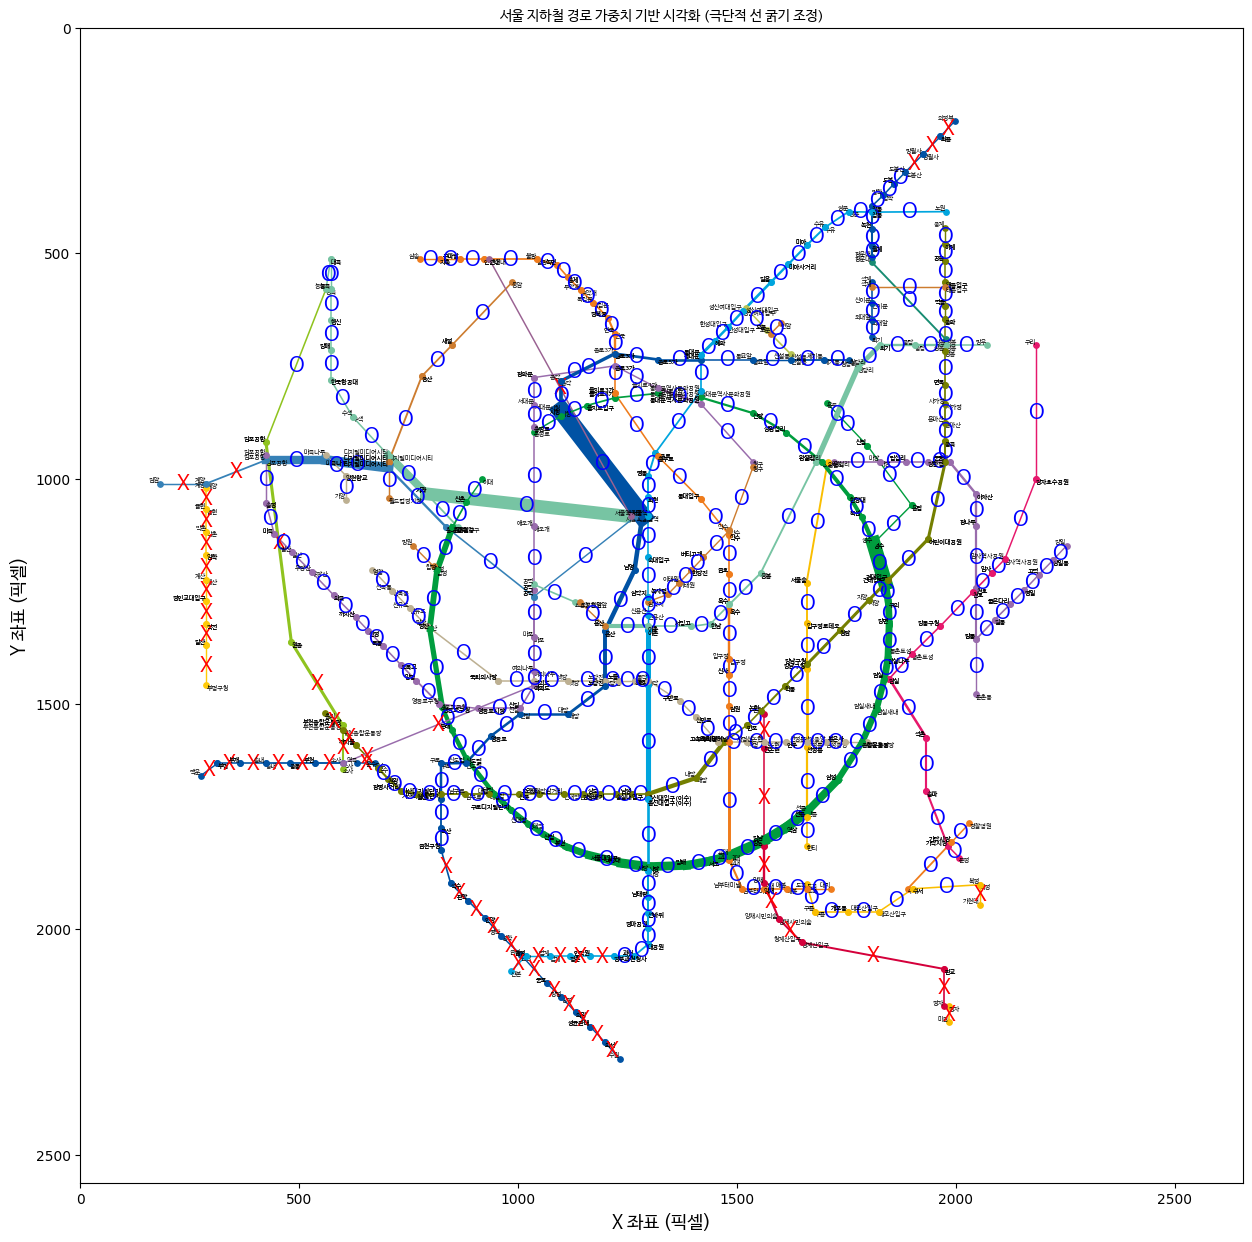

In [2]:
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm
import pandas as pd

# 1. 데이터 불러오기
file_path = "/root/Metro_Visualization/선의 굵기/0204_40p_avg_cumulative_passenger_xy.xlsx"
df = pd.read_excel(file_path, sheet_name='Sheet1')

# 2. 폰트 설정
font_path = "/root/Metro_Visualization/NanumBarunGothic.ttf"
font_prop = fm.FontProperties(fname=font_path)
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

# 3. 이미지 크기 설정
image_width = 2656
image_height = 2562

# 4. 노선 색상 매핑
line_colors = {
    "01호선": "#0052A4", "02호선": "#009D3E", "03호선": "#EF7C1C", "04호선": "#00A5DE",
    "05호선": "#996CAC", "06호선": "#CD7C2F", "07호선": "#747F00", "08호선": "#E6186C",
    "09호선": "#BDB092", "경의선": "#77C4A3", "신분당선": "#D4003B", "수인분당선": "#FABE00",
    "공항철도": "#3681B7", "인천1호선": "#FFCA08", "인천2호선": "#ED8B00",
    "의정부경전철": "#FDA600", "용인경전철": "#6FB245", "우이신설경전철": "#B7C452",
    "경춘선": "#178C72", "경강선": "#003DA5", "서해선": "#8FC31F", "신림선": "#6789CA",
    "01-1호선": "#0052A4", "01-2호선": "#0052A4", "01-3호선": "#0052A4", "01-4호선": "#0052A4", "01-5호선": "#0052A4",
    "02-1호선": "#009D3E", "02-2호선": "#009D3E", "02-3호선": "#009D3E", "02-4호선": "#009D3E",
    "05-1호선": "#996CAC", "05-2호선": "#996CAC",
    "경의선-1호선": "#77C4A3", "경춘선-1호선": "#178C72", "경춘선-2호선": "#178C72",
    "GTX-A": "#9A6292", "GTX-A-1": "#9A6292"
}

# 5. 가중 평균 정규화 (선의 두께 설정)
min_weight = df["avg_cum_passenger"].min()
max_weight = df["avg_cum_passenger"].max()
df["normalized_weight"] = (df["avg_cum_passenger"] - min_weight) / (max_weight - min_weight)

# 6. 캔버스 준비
fig, ax = plt.subplots(figsize=(15, 15))
ax.set_xlim(0, image_width)
ax.set_ylim(image_height, 0)  # Y축 뒤집기

# 7. 경로 시각화
for _, row in df.iterrows():
    start_x, start_y = row["start_x"], row["start_y"]
    end_x, end_y = row["end_x"], row["end_y"]
    line_color = line_colors.get(row["line_y"], "#000000")  # line_y의 노선 색상

    # **선의 굵기 극단적 조정 (최대 대비 강조)**
    weight = (row["normalized_weight"] ** 2) * 12 + 1  # 가중치 지수 변환 적용

    # 8. 선 그리기 (강한 대비)
    ax.plot([start_x, end_x], [start_y, end_y], color=line_color, linewidth=weight, alpha=1.0)

    # 9. 역 점 표시 (노선 색과 동일)
    ax.scatter(start_x, start_y, color=line_color, s=15, zorder=3)  # 시작역 점
    ax.scatter(end_x, end_y, color=line_color, s=15, zorder=3)  # 도착역 점

    # 10. 역 이름 표시
    ax.text(start_x, start_y, row["start_station"], fontsize=4.5, fontproperties=font_prop, ha="right", va="bottom")
    ax.text(end_x, end_y, row["end_station"], fontsize=4.5, fontproperties=font_prop, ha="left", va="top")

    # 11. climate_pass 여부에 따라 O 또는 X 표시
    mid_x = (start_x + end_x) / 2
    mid_y = (start_y + end_y) / 2
    if row["climate_pass"] == "O":
        ax.text(mid_x, mid_y, "O", fontsize=15, color="blue", fontproperties=font_prop, ha="center", va="center")
    elif row["climate_pass"] == "X":
        ax.text(mid_x, mid_y, "X", fontsize=15, color="red", fontproperties=font_prop, ha="center", va="center")

# 12. 제목 및 레이블 설정
ax.set_title("서울 지하철 경로 가중치 기반 시각화 (극단적 선 굵기 조정)", fontsize=16, fontproperties=font_prop)
ax.set_xlabel("X 좌표 (픽셀)", fontsize=13, fontproperties=font_prop)
ax.set_ylabel("Y 좌표 (픽셀)", fontsize=13, fontproperties=font_prop)

# 13. 이미지 저장 및 표시
output_path = "/root/Metro_Visualization/선의 굵기/0204_가중치_기반_경로_시각화_역이름.png"
plt.savefig(output_path, dpi=300, bbox_inches="tight", transparent=False)
plt.show()

In [8]:
# 1. 승객수 기준으로 내림차순 정렬
sorted_df = df.sort_values(by="avg_cum_passenger", ascending=False)

# 2. 정렬된 데이터프레임에서 필요한 컬럼 선택
ranked_df = sorted_df[["start_station", "end_station", "line_y", "line_x", "climate_pass", "avg_cum_passenger"]]

# 3. 인덱스를 1부터 다시 설정하여 순위를 부여
ranked_df = ranked_df.reset_index(drop=True)
ranked_df.index += 1  # 인덱스를 1부터 시작

# 4. 결과를 CSV 파일로 저장
output_path = "/root/Metro_Visualization/선의 굵기/0204_sorted_passenger_rank.csv"
ranked_df.to_csv(output_path, index_label="Rank", encoding="utf-8-sig")

# 5. 상위 10개만 출력
print(ranked_df.head(10))

print(f"정렬된 데이터가 파일로 저장되었습니다: {output_path}")

   start_station end_station   line_y   line_x climate_pass  avg_cum_passenger
1            서울역          시청     01호선     01호선            O      531282.863636
2           건대입구          성수   02-3호선   02-3호선            O      470210.136364
3             가좌         서울역  경의선-1호선  경의선-1호선            O      443926.636364
4             강남          교대     02호선     02호선            O      395513.909091
5             선릉          역삼     02호선     02호선            O      384846.045455
6             강남          역삼     02호선     02호선            O      384386.590909
7       디지털미디어시티        마곡나루     공항철도     공항철도            O      383713.454545
8            낙성대          사당     02호선     02호선            O      371578.954545
9             방배          사당     02호선     02호선            O      361178.000000
10            교대          서초     02호선     02호선            O      359047.363636
정렬된 데이터가 파일로 저장되었습니다: /root/Metro_Visualization/선의 굵기/0204_sorted_passenger_rank.csv
